In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10,cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Flatten,Dropout,Conv2D,MaxPool2D

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


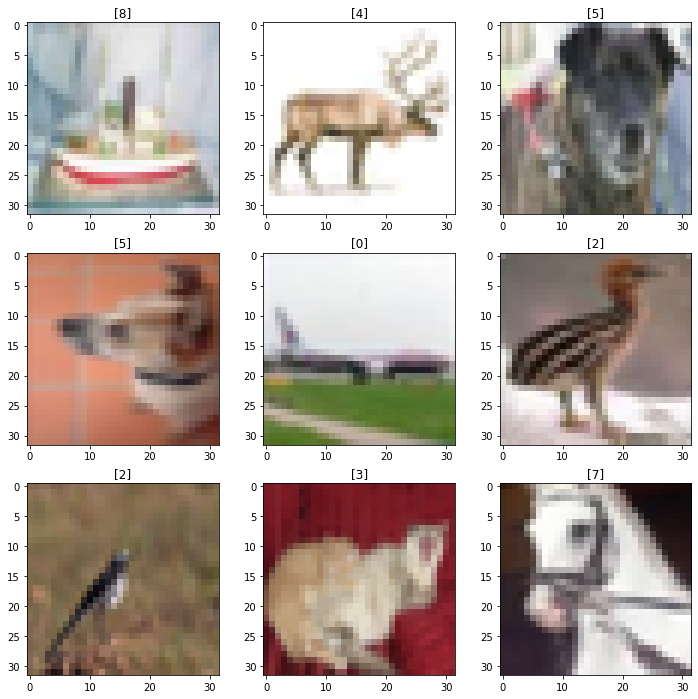

In [5]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(x_train[idx[i]], (32,32,3))
    plt.imshow(grid_data, cmap='gray')

## Data Preprocessing

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
num_classes = y_train.max()+1 #10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
#Model Building
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense,MaxPooling2D
from tensorflow.keras import optimizers

In [12]:
model = None
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu', 
                 kernel_initializer='he_normal'))
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,batch_size=128,epochs=5)

Epoch 1/5
391/391 [==============================] - 38s 20ms/step - loss: 1.7468 - accuracy: 0.3721
Epoch 2/5
391/391 [==============================] - 8s 19ms/step - loss: 1.1128 - accuracy: 0.6132
Epoch 3/5
391/391 [==============================] - 8s 19ms/step - loss: 0.9336 - accuracy: 0.6751
Epoch 4/5
391/391 [==============================] - 8s 20ms/step - loss: 0.8296 - accuracy: 0.7125
Epoch 5/5
391/391 [==============================] - 8s 20ms/step - loss: 0.7330 - accuracy: 0.7488


In [15]:
prediction_score = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.9034600853919983, 0.6912000179290771]


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [17]:
### SGD
model = None
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-64
model.add(Conv2D(64, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [18]:
## sgd optimiser with different learning rates
l_rate = [0.0001,0.001,0.01,0.1,1,10]
for lr in range(len(l_rate)):
   sgd = optimizers.SGD(lr=l_rate[lr])
   model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 2.2784 - accuracy: 0.1412
with learning rate 0.0001 
loss : 2.278421640396118
Accuracy : 0.1412000060081482
313/313 [==============================] - 1s 4ms/step - loss: 2.0758 - accuracy: 0.2868
with learning rate 0.001 
loss : 2.075754165649414
Accuracy : 0.28679999709129333
313/313 [==============================] - 1s 4ms/step - loss: 1.6325 - accuracy: 0.4314
with learning rate 0.01 
loss : 1.6325474977493286
Accuracy : 0.43140000104904175
313/313 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.1000
with learning rate 0.1 
loss : 2.3026304244995117
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3041 - accuracy: 0.1000
with learning rate 1 
loss : 2.304070234298706
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3453 - accuracy: 0.1000
with learning rate 10 
loss : 2.345332384109497
Accuracy : 0.

In [20]:
## Adam optimiser with different learning rates
l_rate = [0.00001,0.0001,0.001,0.01,0.1,]
for lr in range(len(l_rate)):
   adam = optimizers.Adam(lr=l_rate[lr])
   model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
   model.fit(x_train,y_train,batch_size=256,epochs=5,verbose=0)
   results = model.evaluate(x_test,y_test)
   print(f"with learning rate {l_rate[lr]} \nloss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 2.3432 - accuracy: 0.1000
with learning rate 1e-05 
loss : 2.343228578567505
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3263 - accuracy: 0.1000
with learning rate 0.0001 
loss : 2.3263185024261475
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000
with learning rate 0.001 
loss : 2.3025922775268555
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.1000
with learning rate 0.01 
loss : 2.3027610778808594
Accuracy : 0.10000000149011612
313/313 [==============================] - 1s 4ms/step - loss: 2.3054 - accuracy: 0.1000
with learning rate 0.1 
loss : 2.3053550720214844
Accuracy : 0.10000000149011612


In [21]:
# Adding dropout
model = None
model = Sequential()
#model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
model.add(Dropout(0.25))
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(Dropout(0.25))
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 8s 27ms/step - loss: 2.1272 - accuracy: 0.2188 - val_loss: 1.9335 - val_accuracy: 0.3323
Epoch 2/10
274/274 [==============================] - 7s 24ms/step - loss: 1.8438 - accuracy: 0.3512 - val_loss: 1.8427 - val_accuracy: 0.3618
Epoch 3/10
274/274 [==============================] - 7s 24ms/step - loss: 1.7458 - accuracy: 0.3902 - val_loss: 1.7814 - val_accuracy: 0.3985
Epoch 4/10
274/274 [==============================] - 7s 24ms/step - loss: 1.6916 - accuracy: 0.4105 - val_loss: 1.7267 - val_accuracy: 0.4161
Epoch 5/10
274/274 [==============================] - 7s 24ms/step - loss: 1.6342 - accuracy: 0.4289 - val_loss: 1.6985 - val_accuracy: 0.4107
Epoch 6/10
274/274 [==============================] - 7s 24ms/step - loss: 1.5544 - accuracy: 0.4560 - val_loss: 1.6020 - val_accuracy: 0.4432
Epoch 7/10
274/274 [==============================] - 7s 24ms/step - loss: 1.5135 - accuracy: 0.4657 - val_loss: 1.5571 - val_accuracy: 0.4687

In [24]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4541 - accuracy: 0.5037


In [25]:
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

Loss : 1.4540936946868896
Accuracy : 0.5037000179290771


In [26]:
# Batch Normalization
model = None
model = Sequential()
#model.add(Conv2D(32,kernel_size=(3,3)))
# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), 
                 padding='same', 
                 input_shape=(32, 32, 3), 
                 activation='relu'))
model.add(BatchNormalization())
# conv3-64
model.add(Conv2D(64, (3, 3),
                 activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Flatten
model.add(Flatten())
# FC-10
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 7s 24ms/step - loss: 1.9097 - accuracy: 0.3916 - val_loss: 2.2272 - val_accuracy: 0.2535
Epoch 2/10
274/274 [==============================] - 6s 22ms/step - loss: 1.2100 - accuracy: 0.5842 - val_loss: 1.3766 - val_accuracy: 0.5062
Epoch 3/10
274/274 [==============================] - 6s 22ms/step - loss: 0.9958 - accuracy: 0.6536 - val_loss: 1.2504 - val_accuracy: 0.5737
Epoch 4/10
274/274 [==============================] - 6s 22ms/step - loss: 0.8729 - accuracy: 0.7013 - val_loss: 1.2148 - val_accuracy: 0.5967
Epoch 5/10
274/274 [==============================] - 6s 22ms/step - loss: 0.7873 - accuracy: 0.7274 - val_loss: 1.3350 - val_accuracy: 0.5610
Epoch 6/10
274/274 [==============================] - 6s 22ms/step - loss: 0.7294 - accuracy: 0.7493 - val_loss: 1.2665 - val_accuracy: 0.5927
Epoch 7/10
274/274 [==============================] - 6s 23ms/step - loss: 0.6701 - accuracy: 0.7724 - val_loss: 1.2698 - val_accuracy: 0.5967

In [28]:
from tensorflow.keras import regularizers

In [29]:
##3 L2 regularization
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [30]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 16s 52ms/step - loss: 3.3012 - accuracy: 0.1927 - val_loss: 2.9117 - val_accuracy: 0.3309
Epoch 2/10
274/274 [==============================] - 14s 51ms/step - loss: 2.8676 - accuracy: 0.3393 - val_loss: 2.7752 - val_accuracy: 0.3539
Epoch 3/10
274/274 [==============================] - 14s 51ms/step - loss: 2.6573 - accuracy: 0.3791 - val_loss: 2.6074 - val_accuracy: 0.3818
Epoch 4/10
274/274 [==============================] - 14s 50ms/step - loss: 2.5026 - accuracy: 0.4047 - val_loss: 2.4329 - val_accuracy: 0.4121
Epoch 5/10
274/274 [==============================] - 14s 51ms/step - loss: 2.3741 - accuracy: 0.4257 - val_loss: 2.3412 - val_accuracy: 0.4234
Epoch 6/10
274/274 [==============================] - 14s 51ms/step - loss: 2.2684 - accuracy: 0.4391 - val_loss: 2.2226 - val_accuracy: 0.4367
Epoch 7/10
274/274 [==============================] - 14s 50ms/step - loss: 2.1864 - accuracy: 0.4430 - val_loss: 2.2337 - val_accuracy:

In [31]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 3s 8ms/step - loss: 1.9775 - accuracy: 0.4546
Loss : 1.9775296449661255
Accuracy : 0.4546000063419342


In [32]:
##4 
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


In [33]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 18s 64ms/step - loss: 3.4861 - accuracy: 0.3272 - val_loss: 3.5165 - val_accuracy: 0.2128
Epoch 2/10
274/274 [==============================] - 17s 62ms/step - loss: 2.4885 - accuracy: 0.4968 - val_loss: 2.6920 - val_accuracy: 0.4093
Epoch 3/10
274/274 [==============================] - 17s 62ms/step - loss: 2.0860 - accuracy: 0.5582 - val_loss: 1.9697 - val_accuracy: 0.5680
Epoch 4/10
274/274 [==============================] - 17s 62ms/step - loss: 1.8131 - accuracy: 0.6115 - val_loss: 1.9599 - val_accuracy: 0.5485
Epoch 5/10
274/274 [==============================] - 17s 62ms/step - loss: 1.6046 - accuracy: 0.6530 - val_loss: 1.7743 - val_accuracy: 0.5834
Epoch 6/10
274/274 [==============================] - 17s 63ms/step - loss: 1.4366 - accuracy: 0.6852 - val_loss: 1.6885 - val_accuracy: 0.5906
Epoch 7/10
274/274 [==============================] - 17s 62ms/step - loss: 1.3196 - accuracy: 0.7055 - val_loss: 1.6655 - val_accuracy:

In [34]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 2s 8ms/step - loss: 1.4186 - accuracy: 0.6306
Loss : 1.4185575246810913
Accuracy : 0.6305999755859375


In [35]:
##5 
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [36]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 27s 95ms/step - loss: 3.6326 - accuracy: 0.2959 - val_loss: 3.3270 - val_accuracy: 0.1560
Epoch 2/10
274/274 [==============================] - 26s 93ms/step - loss: 2.2768 - accuracy: 0.4700 - val_loss: 2.3325 - val_accuracy: 0.4317
Epoch 3/10
274/274 [==============================] - 26s 94ms/step - loss: 1.9974 - accuracy: 0.5372 - val_loss: 2.3522 - val_accuracy: 0.4339
Epoch 4/10
274/274 [==============================] - 26s 95ms/step - loss: 1.8137 - accuracy: 0.5750 - val_loss: 1.9420 - val_accuracy: 0.5285
Epoch 5/10
274/274 [==============================] - 26s 94ms/step - loss: 1.6663 - accuracy: 0.6068 - val_loss: 1.9163 - val_accuracy: 0.5257
Epoch 6/10
274/274 [==============================] - 26s 94ms/step - loss: 1.5325 - accuracy: 0.6330 - val_loss: 1.6916 - val_accuracy: 0.5753
Epoch 7/10
274/274 [==============================] - 26s 94ms/step - loss: 1.4319 - accuracy: 0.6529 - val_loss: 1.8479 - val_accuracy:

In [37]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 3s 10ms/step - loss: 1.4094 - accuracy: 0.6207
Loss : 1.4094271659851074
Accuracy : 0.6207000017166138


In [38]:
##6 adding maxpooling layers
model = None
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dense(16,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(32,kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(Dense(64,kernel_regularizer=regularizers.L2(0.01)))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [39]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 8s 24ms/step - loss: 3.2423 - accuracy: 0.1507 - val_loss: 3.3903 - val_accuracy: 0.1082
Epoch 2/10
274/274 [==============================] - 6s 22ms/step - loss: 2.7813 - accuracy: 0.2783 - val_loss: 2.7413 - val_accuracy: 0.2605
Epoch 3/10
274/274 [==============================] - 6s 22ms/step - loss: 2.5428 - accuracy: 0.3351 - val_loss: 2.4208 - val_accuracy: 0.3449
Epoch 4/10
274/274 [==============================] - 6s 22ms/step - loss: 2.3691 - accuracy: 0.3652 - val_loss: 2.2876 - val_accuracy: 0.3801
Epoch 5/10
274/274 [==============================] - 6s 22ms/step - loss: 2.2329 - accuracy: 0.3997 - val_loss: 2.4628 - val_accuracy: 0.3125
Epoch 6/10
274/274 [==============================] - 6s 22ms/step - loss: 2.1197 - accuracy: 0.4136 - val_loss: 2.2594 - val_accuracy: 0.3596
Epoch 7/10
274/274 [==============================] - 6s 22ms/step - loss: 2.0269 - accuracy: 0.4306 - val_loss: 2.0862 - val_accuracy: 0.4072

In [40]:
results = model.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 2s 6ms/step - loss: 2.2028 - accuracy: 0.3519
Loss : 2.202796220779419
Accuracy : 0.35190001130104065


In [41]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 5.1MB/s 


In [42]:
### VGGNET

from tensorflow.keras.applications import VGG16,VGG19

In [43]:
#Build the model

'The first base model used is VGG19. The pretrained weights from the imagenet challenge are used'
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

80142336/80134624 [==============================] - 5s 0us/step


In [44]:
model_1= Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())

In [45]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [47]:
#Check final model summary
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

In [48]:
model_1.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model_1.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 99s 78ms/step - loss: 1.5962 - accuracy: 0.4357 - val_loss: 0.7481 - val_accuracy: 0.7465
Epoch 2/20
1250/1250 [==============================] - 97s 77ms/step - loss: 0.7393 - accuracy: 0.7535 - val_loss: 0.6147 - val_accuracy: 0.7939
Epoch 3/20
1250/1250 [==============================] - 96s 77ms/step - loss: 0.5547 - accuracy: 0.8122 - val_loss: 0.6511 - val_accuracy: 0.7858
Epoch 4/20
1250/1250 [==============================] - 96s 77ms/step - loss: 0.4376 - accuracy: 0.8508 - val_loss: 0.5272 - val_accuracy: 0.8244
Epoch 5/20
1250/1250 [==============================] - 96s 77ms/step - loss: 0.3513 - accuracy: 0.8817 - val_loss: 0.4958 - val_accuracy: 0.8325
Epoch 6/20
1250/1250 [==============================] - 97s 78ms/step - loss: 0.2802 - accuracy: 0.9058 - val_loss: 0.5103 - val_accuracy: 0.8352
Epoch 7/20
1250/1250 [==============================] - 96s 77ms/step - loss: 0.2260 - accuracy: 0.9232 - val_loss: 0.5316 -

In [50]:
results = model_1.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 7s 23ms/step - loss: 0.7478 - accuracy: 0.8487
Loss : 0.7477682828903198
Accuracy : 0.8486999869346619


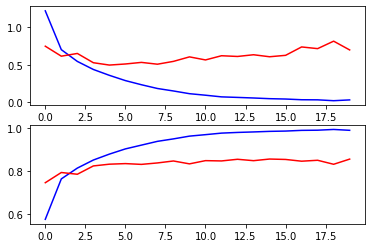

In [51]:
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

## Hyper parameter tuning

In [52]:
!pip install keras-tuner

In [53]:
import kerastuner as kt

In [54]:
def build_model(hp):  
  model = Sequential([
    Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,1e-4])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [55]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [56]:
tuner=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='my_dir',project_name="cnn_cifar_10")

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [59]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.10220000147819519

Best val_accuracy So Far: 0.6308000087738037
Total elapsed time: 00h 09m 42s
INFO:tensorflow:Oracle triggered exit


In [60]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.9259 - accuracy: 0.3059 - val_loss: 1.4960 - val_accuracy: 0.4681
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4476 - accuracy: 0.4870 - val_loss: 1.3922 - val_accuracy: 0.5046
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.3431 - accuracy: 0.5240 - val_loss: 1.3636 - val_accuracy: 0.5106
Epoch 4/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2702 - accuracy: 0.5520 - val_loss: 1.2978 - val_accuracy: 0.5411
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2030 - accuracy: 0.5788 - val_loss: 1.2388 - val_accuracy: 0.5652
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1447 - accuracy: 0.5969 - val_loss: 1.2164 - val_accuracy: 0.5770
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0998 - accuracy: 0.6149 - val_loss: 1.1822 -

In [61]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(x_train, y_train, epochs=best_epoch)

Epoch 1/18
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8583 - accuracy: 0.3182
Epoch 2/18
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3783 - accuracy: 0.5138
Epoch 3/18
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2533 - accuracy: 0.5574
Epoch 4/18
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1787 - accuracy: 0.5872
Epoch 5/18
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0942 - accuracy: 0.6143
Epoch 6/18
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0403 - accuracy: 0.6385
Epoch 7/18
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9844 - accuracy: 0.6561
Epoch 8/18
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9467 - accuracy: 0.6711
Epoch 9/18
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9018 - accuracy: 0.6903
Epoch 10/18
1563/1563 [==============================] - 12s 8ms/step - l

In [62]:
results = hypermodel.evaluate(x_test,y_test)
print(f"Loss : {results[0]}\nAccuracy : {results[1]}")

313/313 [==============================] - 1s 4ms/step - loss: 0.9893 - accuracy: 0.6665
Loss : 0.989334762096405
Accuracy : 0.6664999723434448
